<img src="http://oci02.img.iteso.mx/identidad_de_instancia_2018/ITESO/Logos%20ITESO/Logo-ITESO-Principal.jpg">

<center> <font color= #004A94> <font size = 6> Lic. Ingeniería Financiera </font> <br> <br> <font color= #AABCBB> <font size = 4>I.F. Karen Violeta García Hernandez - if707178@iteso.mx </font>

<center><font color=#50C8C4><font size=5> Laboratorio 1: Tading Manual </font> <br> <br>

<center> <font color= #004A94 > <font size = 4> Primavera 2020 </font>  |  <font color= #004A94> <font size = 4> Repositorio: <a href='https://github.com/violetarcia/LAB_0_KVGH.git'>Link</a></font>

---

<div style="text-align:center"><span style="color:#50C8C4; font-family:Georgia; font-size:2.2em;"> Resumen </span></div>

<p style = "font-family: Calibri Light; font-size:1.3em;color:black; LINE-HEIGHT:25px"> En este laboratorio se dedicará a hacer trading manual </p>

---

<div style="text-align:center"><span style="color:#50C8C4; font-family:Georgia; font-size:2.2em;"> Código </span></div>

<p style = "font-family: Calibri Light; font-size:1.3em;color:black; LINE-HEIGHT:25px"> A continuación se desglosa el código con el cual se analizan varias divisa. Primero se empieza importando paqueterías y archivos que nos serán útiles</p>

In [1]:
import funciones as fn                              # Para procesamiento de datos
import pandas as pd                                 # Procesamiento de datos
import matplotlib.pyplot as plt                     # Visualizar graficas básicas
import numpy as np
import seaborn as sns
import scipy.stats as st
from sklearn.metrics import r2_score

In [2]:
# Lista de divisas que me gustaria analizar
instrument = ['EUR_USD', 'GBP_USD', 'NZD_USD', 'AUD_USD', 'USD_JPY',
              'USD_CNH', 'USD_SGD', 'USD_HUF', 'USD_HKD', 'USD_CZK',
              'USD_CAD', 'USD_MXN', 'USD_DKK', 'USD_CHF', 'USD_SEK']
pd.set_option('display.max_rows', 8)


In [3]:
'''Función Divisa
         Obtener el precio de cierre de tal instrumento
         
         Sólo un parametro: el instrumento. (Ejem: 'EUR_USD')
        
        Para cambiar las fechas o temporalidad es necesario hacerlo desde la función
'''
def Divisa(ins):
    OA_Ak = '800f1b3f91d7cb0a713c532e17823f6d-f9acd6a21490f97aef649dfd8e723435'
    OA_Gn = "H1"                                                     # Granularidad
    fini = pd.to_datetime("2020-01-26 00:00:00").tz_localize('GMT')  # Fecha inicial
    ffin = pd.to_datetime("2020-02-09 00:00:00").tz_localize('GMT')  # Fecha final
    
    # Descargar precios masivos
    df = fn.f_precios_masivos(p0_fini=fini, p1_ffin=ffin, p2_gran=OA_Gn, p3_inst=ins, p4_oatk=OA_Ak, p5_ginc=4900)
    #close = df['Close']
    
    return df

def Close(df):
    return df['Close']

In [4]:
# Utilizar la funcion para la lista de divisas de las cuales se requieren los precios de cierre
Data = list(map(Divisa, instrument))

# Precios

In [5]:
# Se acomoda la lista en un solo DataFrame
closes = pd.DataFrame([Close(Data[i]) for i in range(len(Data))]).transpose()
closes.columns = instrument

In [6]:
# En el siguiente DF estan los precios de cierre (cada hora) de lo que va del año (2020)
closes

,EUR_USD,GBP_USD,NZD_USD,AUD_USD,USD_JPY,USD_CNH,USD_SGD,USD_HUF,USD_HKD,USD_CZK,USD_CAD,USD_MXN,USD_DKK,USD_CHF,USD_SEK
0,1.10312,1.30748,0.65942,0.68162,108.911,6.95346,1.35316,304.669,7.77353,22.80897,1.31507,18.84043,6.77413,0.97066,9.56555
1,1.10246,1.30614,0.65732,0.68012,108.801,6.95882,1.35444,305.054,7.77474,22.81816,1.31620,18.86716,6.77834,0.97012,9.57944
2,1.10322,1.30690,0.65844,0.68142,109.028,6.95501,1.35349,304.838,7.77466,22.81528,1.31504,18.84239,6.77378,0.97036,9.56786
3,1.10336,1.30678,0.65788,0.68092,108.978,6.96148,1.35406,304.839,7.77473,22.81178,1.31578,18.85180,6.77282,0.97049,9.56972
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,1.09427,1.29006,0.64018,0.66766,109.808,7.00578,1.38985,309.336,7.76530,22.90042,1.33039,18.77714,6.82851,0.97767,9.65945
236,1.09437,1.28934,0.63990,0.66746,109.749,7.00720,1.39001,309.348,7.76582,22.89156,1.33022,18.77931,6.82793,0.97742,9.65788
237,1.09463,1.28872,0.64022,0.66773,109.734,7.00910,1.38982,309.276,7.76568,22.88194,1.32991,18.79843,6.82628,0.97729,9.65637
238,1.09473,1.28845,0.64008,0.66774,109.769,7.00584,1.38970,308.949,7.76562,22.87569,1.33020,18.77312,6.82552,0.97751,9.65600


In [7]:
# Calcular la matriz de coefecientes de correlacion
corr = closes.corr()

In [8]:
# Visualizarlo
cmap = cmap=sns.diverging_palette(5, 250, as_cmap=True)

def magnify():
    return [dict(selector="th",
                 props=[("font-size", "7pt")]),
            dict(selector="td",
                 props=[('padding', "0em 0em")]),
            dict(selector="th:hover",
                 props=[("font-size", "12pt")]),
            dict(selector="tr:hover td:hover",
                 props=[('max-width', '200px'),
                        ('font-size', '12pt')])
]

corr.style.background_gradient(cmap, axis=1)\
    .set_properties(**{'max-width': '80px', 'font-size': '10pt'})\
    .set_caption("Hover to magify")\
    .set_precision(2)\
    .set_table_styles(magnify())

,EUR_USD,GBP_USD,NZD_USD,AUD_USD,USD_JPY,USD_CNH,USD_SGD,USD_HUF,USD_HKD,USD_CZK,USD_CAD,USD_MXN,USD_DKK,USD_CHF,USD_SEK
EUR_USD,1,0.77,0.1,-0.19,-0.78,0.44,-0.45,-0.89,0.076,-0.35,-0.14,0.45,-1,-0.95,0.096
GBP_USD,0.77,1,0.27,-0.055,-0.73,0.17,-0.59,-0.66,0.22,-0.0036,-0.44,0.59,-0.77,-0.74,0.082
NZD_USD,0.1,0.27,1,0.84,-0.3,-0.57,-0.8,-0.15,0.83,0.5,-0.86,0.37,-0.1,0.0019,-0.41
AUD_USD,-0.19,-0.055,0.84,1,0.19,-0.78,-0.39,-0.029,0.53,0.25,-0.55,-0.081,0.19,0.33,-0.75
USD_JPY,-0.78,-0.73,-0.3,0.19,1,-0.38,0.75,0.53,-0.45,-0.21,0.5,-0.77,0.78,0.8,-0.41
USD_CNH,0.44,0.17,-0.57,-0.78,-0.38,1,0.22,-0.27,-0.35,-0.37,0.48,0.31,-0.44,-0.61,0.52
USD_SGD,-0.45,-0.59,-0.8,-0.39,0.75,0.22,1,0.33,-0.83,-0.55,0.9,-0.66,0.45,0.38,-0.068
USD_HUF,-0.89,-0.66,-0.15,-0.029,0.53,-0.27,0.33,1,0.00092,0.46,0.03,-0.24,0.89,0.8,0.2
USD_HKD,0.076,0.22,0.83,0.53,-0.45,-0.35,-0.83,0.00092,1,0.69,-0.85,0.61,-0.074,-0.043,-0.035
USD_CZK,-0.35,-0.0036,0.5,0.25,-0.21,-0.37,-0.55,0.46,0.69,1,-0.69,0.33,0.35,0.34,0.24


In [9]:
resume_clos = closes.describe()
resume_clos

,EUR_USD,GBP_USD,NZD_USD,AUD_USD,USD_JPY,USD_CNH,USD_SGD,USD_HUF,USD_HKD,USD_CZK,USD_CAD,USD_MXN,USD_DKK,USD_CHF,USD_SEK
count,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000
mean,1.102222,1.303062,0.649225,0.673284,109.173845,6.985167,1.369009,305.999686,7.768901,22.834149,1.323781,18.757395,6.779788,0.970877,9.620432
std,0.003139,0.006571,0.004022,0.003094,0.460075,0.015886,0.010980,1.285430,0.005087,0.072115,0.004886,0.096399,0.019220,0.003526,0.025156
min,1.094270,1.288450,0.639900,0.667120,108.350000,6.953460,1.353160,303.987000,7.760620,22.641010,1.315040,18.565360,6.734920,0.963110,9.556870
25%,1.100225,1.299545,0.646420,0.670700,108.895500,6.972570,1.360095,304.878000,7.765125,22.767355,1.319270,18.682885,6.768385,0.969160,9.599110
50%,1.102140,1.301970,0.648320,0.673680,109.054000,6.983380,1.365500,306.007000,7.767470,22.818160,1.323840,18.755310,6.780280,0.970640,9.625640
75%,1.104070,1.306140,0.652730,0.675415,109.565000,6.996390,1.380670,306.802000,7.773375,22.901500,1.328590,18.841330,6.791855,0.973880,9.638270
max,1.109450,1.320550,0.659420,0.681620,109.996000,7.019600,1.391040,309.358000,7.779160,22.956390,1.331460,18.961280,6.828510,0.977780,9.676130


In [10]:
# Linea de Regresion Lineal
def Regresion_L(x, y):
    z = np.polyfit(x, y, 1)
    y_hat = np.poly1d(z)(x)
    
    # Grafica
    ax.plot(x, y_hat, "r--")

    text = f"$y={z[0]:0.5f}\;x{z[1]:+0.3f}$\n$R^2 = {r2_score(y,y_hat):0.3f}$"
    ax.text(0, 0.99, text,transform=ax.transAxes, fontsize=8, verticalalignment='bottom')
    return z[0], z[1]


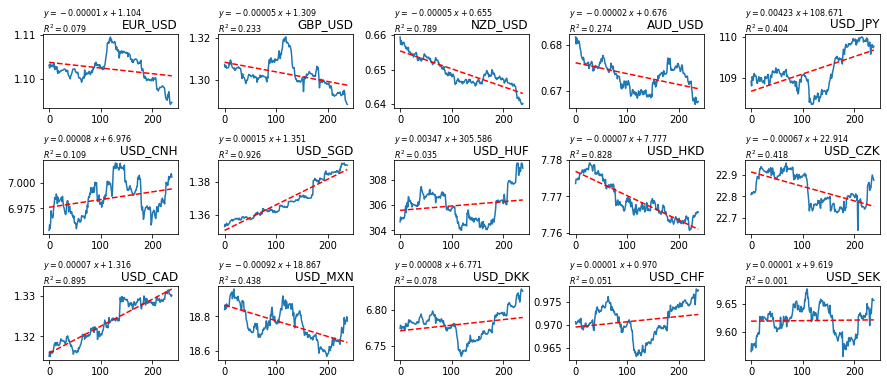

In [11]:
# Graficas

x = np.arange(len(closes))
fig, axs = plt.subplots(3,5, figsize=(15, 6))
fig.subplots_adjust(hspace = .7, wspace=.3)

data = np.arange(len(closes.columns))

m = np.arange(len(closes.columns), dtype='float64')
b = np.arange(len(closes.columns), dtype='float64')


for ax, d in zip(axs.ravel(), data):
    ax.plot(x, closes.iloc[:,d])
    m[d], b[d] = Regresion_L(x, closes.iloc[:,d])
    ax.set_title(instrument[d], loc = 'right')

Las divisas que mejor se ajustan a una tendencia lineal 

# Rendimientos

In [12]:
# Rendimientos
def Returns(closes):
    return np.log(closes/closes.shift(1)).iloc[1:]

In [13]:
rend = [Returns(closes.iloc[:,i]) for i in range(len(closes.columns))]
rend = pd.concat(rend, axis = 1)

In [14]:
resume_rend = rend.describe()
resume_rend

,EUR_USD,GBP_USD,NZD_USD,AUD_USD,USD_JPY,USD_CNH,USD_SGD,USD_HUF,USD_HKD,USD_CZK,USD_CAD,USD_MXN,USD_DKK,USD_CHF,USD_SEK
count,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000
mean,-0.000032,-0.000062,-0.000125,-0.000086,0.000033,0.000032,0.000112,0.000059,-0.000004,0.000012,0.000048,-0.000015,0.000032,0.000030,0.000040
std,0.000462,0.000959,0.000788,0.000936,0.000668,0.000595,0.000660,0.000841,0.000099,0.000861,0.000495,0.001073,0.000465,0.000670,0.000824
min,-0.001459,-0.003878,-0.003190,-0.002518,-0.003269,-0.002340,-0.000963,-0.003112,-0.000375,-0.007116,-0.001992,-0.003081,-0.001718,-0.002129,-0.004535
25%,-0.000269,-0.000501,-0.000629,-0.000615,-0.000282,-0.000306,-0.000195,-0.000310,-0.000054,-0.000220,-0.000218,-0.000605,-0.000215,-0.000286,-0.000299
50%,-0.000009,-0.000053,-0.000069,-0.000089,0.000018,0.000036,0.000022,0.000034,0.000003,0.000031,0.000075,0.000019,0.000017,0.000046,-0.000004
75%,0.000216,0.000351,0.000370,0.000430,0.000422,0.000347,0.000287,0.000418,0.000060,0.000342,0.000309,0.000538,0.000248,0.000349,0.000417
max,0.001671,0.003989,0.002496,0.004044,0.002084,0.002077,0.006219,0.003346,0.000288,0.005257,0.002410,0.003270,0.001450,0.002945,0.003252


In [15]:
cor = rend.corr()
cor.style.background_gradient(cmap, axis=1)\
    .set_properties(**{'max-width': '80px', 'font-size': '10pt'})\
    .set_caption("Hover to magify")\
    .set_precision(2)\
    .set_table_styles(magnify())

,EUR_USD,GBP_USD,NZD_USD,AUD_USD,USD_JPY,USD_CNH,USD_SGD,USD_HUF,USD_HKD,USD_CZK,USD_CAD,USD_MXN,USD_DKK,USD_CHF,USD_SEK
EUR_USD,1,0.47,0.35,0.19,-0.31,0.058,-0.15,-0.61,0.028,-0.55,-0.14,0.028,-1,-0.68,-0.52
GBP_USD,0.47,1,0.21,0.17,-0.14,-0.058,-0.16,-0.3,-0.01,-0.25,-0.29,-0.077,-0.47,-0.35,-0.32
NZD_USD,0.35,0.21,1,0.74,0.26,-0.45,-0.45,-0.34,-0.096,-0.25,-0.44,-0.36,-0.35,-0.037,-0.5
AUD_USD,0.19,0.17,0.74,1,0.45,-0.59,-0.48,-0.31,-0.071,-0.2,-0.52,-0.47,-0.19,0.15,-0.47
USD_JPY,-0.31,-0.14,0.26,0.45,1,-0.54,-0.28,-0.0061,-0.11,0.07,-0.32,-0.58,0.31,0.63,-0.19
USD_CNH,0.058,-0.058,-0.45,-0.59,-0.54,1,0.52,0.086,0.19,0.075,0.39,0.55,-0.057,-0.38,0.29
USD_SGD,-0.15,-0.16,-0.45,-0.48,-0.28,0.52,1,0.15,0.12,0.14,0.37,0.39,0.15,-0.097,0.25
USD_HUF,-0.61,-0.3,-0.34,-0.31,-0.0061,0.086,0.15,1,0.015,0.45,0.24,0.23,0.61,0.28,0.53
USD_HKD,0.028,-0.01,-0.096,-0.071,-0.11,0.19,0.12,0.015,1,0.089,0.085,0.13,-0.029,-0.12,0.077
USD_CZK,-0.55,-0.25,-0.25,-0.2,0.07,0.075,0.14,0.45,0.089,1,0.15,0.095,0.55,0.29,0.41


## Histogramas

In [16]:
def Normal(y):
    x = np.linspace(min(y),max(y), len(y))
    param = st.norm.fit(y)
    pdf_fitted = st.norm.pdf(x, *param[:-2], loc=param[-2], scale=param[-1])
    
    #Graficas
    ax.plot(x,pdf_fitted)


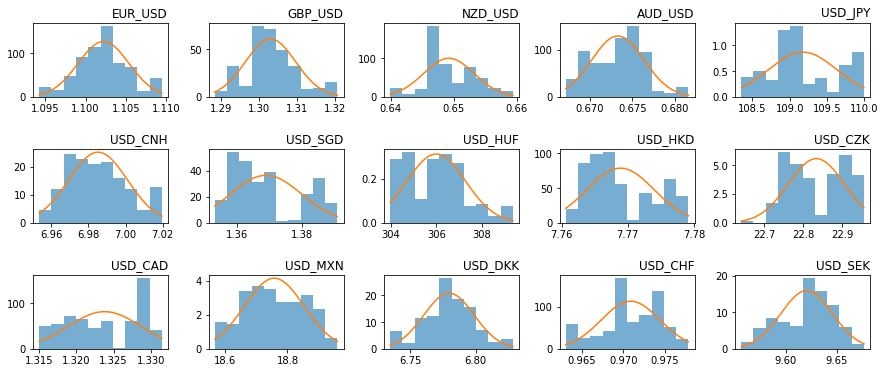

In [17]:
# Graficas
fig, axs = plt.subplots(3,5, figsize=(15, 6))
fig.subplots_adjust(hspace = .7, wspace=.3)

data = np.arange(len(rend.columns))

for ax, d in zip(axs.ravel(), data):
    ax.hist(closes.iloc[:,d], bins = 10, density = True, alpha = 0.6)
    Normal(closes.iloc[:,d])
    ax.set_title(instrument[d], loc = 'right')

In [18]:
def Normal_Test(y, name):
    s,p = st.mstats.normaltest(y)
    print("p value for " + name + " = "+str(p))
    return p
normp_clo = [Normal_Test(closes.iloc[:,i], instrument[i]) for i in range(len(rend.columns))]

p value for EUR_USD = 0.9211055739968714
p value for GBP_USD = 0.006999143405441084
p value for NZD_USD = 0.12272707974737856
p value for AUD_USD = 0.3284642542982776
p value for USD_JPY = 2.62659919079247e-09
p value for USD_CNH = 0.0009630282492126404
p value for USD_SGD = 2.422628914456124e-13
p value for USD_HUF = 0.0029493127856670023
p value for USD_HKD = 5.673450483973356e-13
p value for USD_CZK = 9.476342003716026e-185
p value for USD_CAD = 0.0
p value for USD_MXN = 8.908709253404369e-09
p value for USD_DKK = 0.9132071298448332
p value for USD_CHF = 0.0033187883361303185
p value for USD_SEK = 0.0007211839732493845


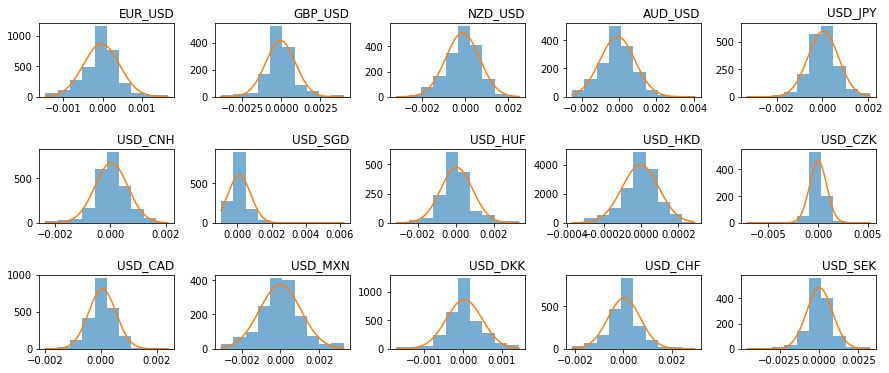

In [19]:
# Graficas
fig, axs = plt.subplots(3,5, figsize=(15, 6))
fig.subplots_adjust(hspace = .7, wspace=.3)

data = np.arange(len(rend.columns))

for ax, d in zip(axs.ravel(), data):
    ax.hist(rend.iloc[:,d], bins = 10, density = True, alpha = 0.6)
    Normal(rend.iloc[:,d])
    ax.set_title(instrument[d], loc = 'right')

In [20]:
normp_rend = [Normal_Test(rend.iloc[:,i], instrument[i]) for i in range(len(rend.columns))]

p value for EUR_USD = 0.0033248475880002393
p value for GBP_USD = 6.112901977685214e-06
p value for NZD_USD = 0.01494437043756603
p value for AUD_USD = 0.0004481657019946087
p value for USD_JPY = 1.2987332033000773e-06
p value for USD_CNH = 4.255423178598692e-05
p value for USD_SGD = 4.362623553118048e-54
p value for USD_HUF = 8.851115288737502e-07
p value for USD_HKD = 0.0002794052359747563
p value for USD_CZK = 7.095785601964563e-31
p value for USD_CAD = 2.452836937866965e-06
p value for USD_MXN = 0.08601856119917682
p value for USD_DKK = 0.002523952454979756
p value for USD_CHF = 8.50407372147841e-05
p value for USD_SEK = 5.809784259381086e-10


In [21]:
# Definimos la tabla donde se mostrarán los resultados

df = pd.DataFrame(index=instrument, columns = ['Media_P', 'DesvEst_P', 'Pendiente', 'Intercepto', 
                                               'Normal_test_P', 'Media_R', 'DesvEst_R', 'Normal_test_R'], dtype='float')


# Mostramos los resultados en la tabla previamente creada

df['Media_P'] = (resume_clos.loc['mean'])
df['DesvEst_P'] = resume_clos.loc['std']

df['Pendiente'] = m
df['Intercepto'] = b

df['Normal_test_P'] = normp_clo

df['Media_R'] = resume_rend.loc['mean']
df['DesvEst_R'] = resume_rend.loc['std']

df['Normal_test_R'] = normp_rend

with pd.option_context('display.max_rows', None, 'display.max_columns', None):  
    display(df)

,Media_P,DesvEst_P,Pendiente,Intercepto,Normal_test_P,Media_R,DesvEst_R,Normal_test_R
EUR_USD,1.102222,0.003139,-0.000013,1.103741,9.211056e-01,-0.000032,0.000462,3.324848e-03
GBP_USD,1.303062,0.006571,-0.000046,1.308517,6.999143e-03,-0.000062,0.000959,6.112902e-06
NZD_USD,0.649225,0.004022,-0.000052,0.655375,1.227271e-01,-0.000125,0.000788,1.494437e-02
AUD_USD,0.673284,0.003094,-0.000023,0.676073,3.284643e-01,-0.000086,0.000936,4.481657e-04
USD_JPY,109.173845,0.460075,0.004228,108.670706,2.626599e-09,0.000033,0.000668,1.298733e-06
USD_CNH,6.985167,0.015886,0.000076,6.976147,9.630282e-04,0.000032,0.000595,4.255423e-05
USD_SGD,1.369009,0.010980,0.000153,1.350825,2.422629e-13,0.000112,0.000660,4.362624e-54
USD_HUF,305.999686,1.285430,0.003474,305.586271,2.949313e-03,0.000059,0.000841,8.851115e-07
USD_HKD,7.768901,0.005087,-0.000067,7.776866,5.673450e-13,-0.000004,0.000099,2.794052e-04
USD_CZK,22.834149,0.072115,-0.000674,22.914407,9.476342e-185,0.000012,0.000861,7.095786e-31


# Sharpe

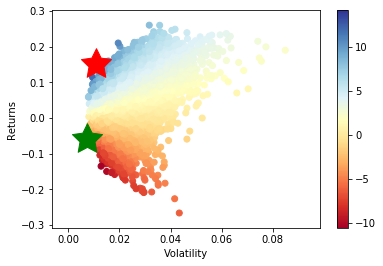

In [22]:

data = rend*30*252
num = 10000


def Sharpe(data, num):
    n = len(data.columns)
    mean = data.mean()
    cov_matrix = data.cov()
    results = np.zeros((num, 3+n))
    for i in range(num):
        w = np.array(np.random.random(n))
        w /= np.sum(w)
        results[i, 3:] = np.round(w, 3)*100
        results[i, 0] = np.sum(mean * w) 
        results[i, 1] = np.dot(np.dot(w.T, cov_matrix), w)/100
        results[i, 2] = results[i,0] / results[i,1]
    return results

results = Sharpe(data, num)
results_frame = pd.DataFrame(results, columns=['ret','stdev','sharpe'] + instrument)
max_sharpe_port = results_frame.iloc[results_frame['sharpe'].idxmax()]
#locate positon of portfolio with minimum standard deviation
min_vol_port = results_frame.iloc[results_frame['stdev'].idxmin()]

#create scatter plot coloured by Sharpe Ratio
plt.scatter(results_frame.stdev,results_frame.ret,c=results_frame.sharpe,cmap='RdYlBu')
plt.xlabel('Volatility')
plt.ylabel('Returns')
plt.colorbar()
#plot red star to highlight position of portfolio with highest Sharpe Ratio
plt.scatter(max_sharpe_port[1],max_sharpe_port[0],marker=(5,1,0),color='r',s=1000)
#plot green star to highlight position of minimum variance portfolio
plt.scatter(min_vol_port[1],min_vol_port[0],marker=(5,1,0),color='g',s=1000)

In [23]:
max_sharpe_port = results_frame.iloc[results_frame['sharpe'].idxmax()]
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  
    print(max_sharpe_port)

ret         0.150221
stdev       0.010616
sharpe     14.150776
EUR_USD    15.700000
GBP_USD     6.500000
NZD_USD     0.600000
AUD_USD     1.900000
USD_JPY    15.400000
USD_CNH     9.000000
USD_SGD     9.300000
USD_HUF     3.800000
USD_HKD     4.600000
USD_CZK     5.000000
USD_CAD    11.800000
USD_MXN     1.300000
USD_DKK    12.700000
USD_CHF     1.000000
USD_SEK     1.300000
Name: 4761, dtype: float64


In [24]:
best = list(max_sharpe_port[3:].sort_values()[-5:].index)
new_c = [closes[i] for i in best ]
new_c = pd.concat(new_c, axis = 1)

new_r = [Returns(new_c.iloc[:,i]) for i in range(len(new_c.columns))]
new_r = pd.concat(new_r, axis = 1)

new_r

,USD_SGD,USD_CAD,USD_DKK,USD_JPY,EUR_USD
1,0.000945,0.000859,0.000621,-0.001011,-0.000598
2,-0.000702,-0.000882,-0.000673,0.002084,0.000689
3,0.000421,0.000563,-0.000142,-0.000459,0.000127
4,0.000812,0.000448,0.000419,-0.000385,-0.000408
...,...,...,...,...,...
235,0.000130,-0.000045,0.000609,0.000000,-0.000630
236,0.000115,-0.000128,-0.000085,-0.000537,0.000091
237,-0.000137,-0.000233,-0.000242,-0.000137,0.000238
238,-0.000086,0.000218,-0.000111,0.000319,0.000091


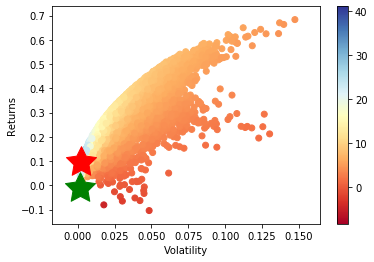

In [25]:
data = new_r*30*252
results = Sharpe(data, num)
results_frame = pd.DataFrame(results, columns=['ret','stdev','sharpe'] + best)
max_sharpe_port = results_frame.iloc[results_frame['sharpe'].idxmax()]
#locate positon of portfolio with minimum standard deviation
min_vol_port = results_frame.iloc[results_frame['stdev'].idxmin()]

#create scatter plot coloured by Sharpe Ratio
plt.scatter(results_frame.stdev,results_frame.ret,c=results_frame.sharpe,cmap='RdYlBu')
plt.xlabel('Volatility')
plt.ylabel('Returns')
plt.colorbar()
#plot red star to highlight position of portfolio with highest Sharpe Ratio
plt.scatter(max_sharpe_port[1],max_sharpe_port[0],marker=(5,1,0),color='r',s=1000)
#plot green star to highlight position of minimum variance portfolio
plt.scatter(min_vol_port[1],min_vol_port[0],marker=(5,1,0),color='g',s=1000)

In [26]:
max_sharpe_port = results_frame.iloc[results_frame['sharpe'].idxmax()]
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  
    print(max_sharpe_port)

ret         0.094760
stdev       0.002307
sharpe     41.080775
USD_SGD     7.900000
USD_CAD     5.800000
USD_DKK    37.700000
USD_JPY     6.800000
EUR_USD    41.700000
Name: 2278, dtype: float64


# Conteo de Velas

Más estadistico

La granularidad mas pequeña se vuelve mas caotico, analisis tecnico funciona mas en periodcidades de una hora


In [27]:
def Open(df):
    return df['Open']

In [28]:
opens = pd.DataFrame([Open(Data[i]) for i in range(len(Data))]).transpose()
opens.columns = instrument

In [29]:
datos_open = pd.DataFrame([opens[i] for i in best ]).transpose()
datos_clos = new_c

In [30]:
# Importante: Open y Close son arrays del mismo tamaño (Handle Excepcion)
def Tendency(Open, Clos):
    tendencia = ['alcista' if Clos[i] >= Open[i] else 'bajista' for i in range(len(Open))]
    return tendencia

In [31]:
tendencia = pd.DataFrame([Tendency(datos_open.iloc[:,i], datos_clos.iloc[:,i]) 
                          for i in range(len(datos_open.columns))]).transpose()
tendencia.columns = best
tendencia

,USD_SGD,USD_CAD,USD_DKK,USD_JPY,EUR_USD
0,alcista,bajista,alcista,bajista,bajista
1,alcista,alcista,alcista,bajista,bajista
2,bajista,bajista,bajista,alcista,alcista
3,alcista,alcista,bajista,bajista,alcista
...,...,...,...,...,...
235,alcista,bajista,alcista,alcista,bajista
236,alcista,bajista,bajista,bajista,alcista
237,bajista,bajista,bajista,bajista,alcista
238,bajista,alcista,bajista,alcista,alcista


In [32]:
# (Tendencia)

def Consecutively(tendencia):
    count = [0]
    
    def conteo(count, a, b):
        if a == b:
            count += 1
        else:
            count = 0
        return  count
    
    temp = [count.append(conteo(count[i], tendencia[i], tendencia[i+1])) for i in range(len(tendencia)-1)]
    return count

In [33]:
consecut = pd.DataFrame([Consecutively(tendencia.iloc[:,i]) for i in range(len(tendencia.columns))]).transpose()
consecut.columns = best
consecut

,USD_SGD,USD_CAD,USD_DKK,USD_JPY,EUR_USD
0,0,0,0,0,0
1,1,0,1,1,1
2,0,0,0,0,0
3,0,0,1,0,1
...,...,...,...,...,...
235,0,2,2,2,2
236,1,3,0,0,0
237,0,4,1,1,1
238,1,0,2,0,2


In [49]:
temp = [len([1 for x in range(len(consecut)) if consecut.iloc[:,i][x] >= 3]) for i in range(len(consecut.columns))]
temp

[16, 20, 27, 22, 26]

Por ejemplo, de todos, el que

# Analisis Tecnico

___

Resistencia: linea imaginaria, donde el precio a rebotado varias veces (No lo atraviesa). Son niveles psicologicos del mercado

Soporte: el precio va a bajar, lo tocó, no lo cruzó y cambia de dirección.

El precio muestra resistencia de moverse, las personas ahi quieren comprar.

___

Lineas de tendencia: inclinadas: visualmente observar que está yendo hacia abajo (poner la linea arriba) o hacia abajo (poerla en la base).

*Siempre la va a respetar, excepto cuando no la respetar. Es decir, no es algo infalible*

Bandas: como hacer una regresion con sus desviaciones (dos lineas). Pero hay falsos positivos
___

Bollinger Bandas: Sobrecompa y sobreventa. Concepto donde el proceso sea de regresiona la media (Tendencia es que regrese a su tendencia) Si elprecio se propone que regresara a la media, pero entonces ¿cual es su media? Si se esta yendo mucho arriba o hacia abajo, va a regresar hacia donde estaba.
 1.- Si se se separa del promedio movil, en algun punto va a volver a regresar.
 2.- Dado que estoy considerando el primero cierto, Si estoy en la banda de arriba, si pega en una barrera, por la fuerza en la que rebota va irse hacia la contraria, como zigzag.
 

# Notas
Usar dos validaciones, una a largo plazo, otra a corto

¿Qué mueven los tipos de cambio? Los derivados, donde el interes no es especular

Analisis tecnico: La historia se repite, pruebas de autocorrelacion (FAQ, FAQ parcial) para ver hasta qué rezago hay significancia.

Depende del time frame que se utilice, en 4 horas puede ser alcista, pero cambiar para la siguiente vela. Si modelas los rezagos de 1 min, es muy diferente a la de 1 hora.